# Customer Segmentation
<hr>
<p> Name: Jeyakumar Sriram </p> 
<p> Class: DAAA/FT/2A/01 </p> 
<p> Admin No.: 2214618 </p> 
<p> Module Code: ST1511 </p> 
<hr>

## References

- Deore, S. (2020) Really, what is Hopkins statistic?, Medium. Available at: https://sushildeore99.medium.com/really-what-is-hopkins-statistic-bad1265df4b (Accessed: 10 July 2023). 
- Eniyei et al. (2018) Assessing clustering tendency, Datanovia. Available at: https://www.datanovia.com/en/lessons/assessing-clustering-tendency/ (Accessed: 03 July 2023). 
- Prathmachowksey (2020) A python implementation for computing the Hopkins’ statistic (Lawson and Jurs 1990) for measuring clustering tendency of data, GitHub. Available at: https://github.com/prathmachowksey/Hopkins-Statistic-Clustering-Tendency (Accessed: 03 July 2023). 
- Saji, B. (2023) Elbow method for finding the optimal number of clusters in K-means, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/#:~:text=K%20Means%20Clustering%20Using%20the%20Elbow%20Method,-In%20the%20Elbow&amp;text=For%20each%20value%20of%20K,plot%20looks%20like%20an%20Elbow. (Accessed: 07 July 2023). 
- K-means clustering algorithm - javatpoint (no date) www.javatpoint.com. Available at: https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning (Accessed: 08 July 2023). 
- Introduction to K-means clustering (no date) Pinecone. Available at: https://www.pinecone.io/learn/k-means-clustering/ (Accessed: 10 July 2023). 
- V, K. (2022) What, why and how of spectral clustering!, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/05/what-why-and-how-of-spectral-clustering/ (Accessed: 08 July 2023). 
- Pai, P. (2021) Hierarchical clustering explained, Medium. Available at: https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8 (Accessed: 08 July 2023). 
- Plot hierarchical clustering dendrogram (no date) scikit. Available at: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html (Accessed: 08 July 2023). 
- Gajjar, K. (2020) Cluster analysis with DBSCAN&nbsp;: Density-based spatial clustering of applications with noise, Medium. Available at: https://medium.com/analytics-vidhya/cluster-analysis-with-dbscan-density-based-spatial-clustering-of-applications-with-noise-6ade1ec23555 (Accessed: 09 July 2023). 
- Gaussian mixture model selection (no date) scikit. Available at: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html (Accessed: 11 July 2023). 

<hr>

### Objective
Use Unsupervised Learning to build a model that can cluster customers of shopping malls

### Background Info

Customer Segmentation is important for a shopping mall (with finite resources). By focusing on the most profitable customers, the shopping mall can focus their marketing resources more strategically.

### The Dataset
| Feature                    | Description                                                                                     |
|----------------------------|-------------------------------------------------------------------------------------------------|
| CustomerID                 | Unique customer identifier ranging from 1 to 200                                                |
| Gender                     | Customer gender                                                                                 |
| Age                        | Customer age                                                                         |
| Income (k$)                | Customer income in thousands of dollars                                                          |
| How Much They Spend        | Amount spent by the customer                                                                     |

Total Rows: 200

All columns are features as this is unsupervised

<hr>

## Libraries

In [15]:
# Data Manipulation
import pandas as pd
import numpy as np
# Data Visualisation
import seaborn as sns; sns.set(); sns.set_palette("rocket_r")
import matplotlib.pyplot as plt
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Models
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import (KMeans, AgglomerativeClustering, 
                             SpectralClustering, AffinityPropagation)
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis
### Overview

In [16]:
df = pd.read_csv("./Customer_Dataset.csv")
df = df.drop("CustomerID",axis=1)
df = df.rename(columns={"Income (k$)":"Income","How Much They Spend":"Spending"})
print(df.isna().sum())
df

Gender      0
Age         0
Income      0
Spending    0
dtype: int64


,Gender,Age,Income,Spending
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Insights:
- There are no null values in any of the columns in the dataset.
- Dataset has one categorical column called Gender while rest are numerical

### Univariate Analysis

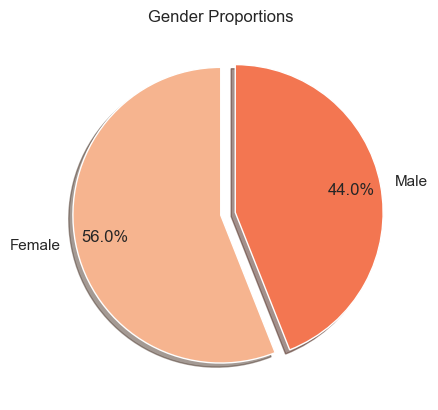

In [17]:
genderPie = df["Gender"].value_counts()
plt.pie(genderPie, labels=genderPie.index, 
        autopct="%.1f%%", pctdistance=0.80,startangle=90,
       shadow=True,explode=(0,0.1))
plt.title("Gender Proportions")
plt.show()

Insights:
- There are more Females than Males in the dataset
- Proportion of Males and Females are similiar 

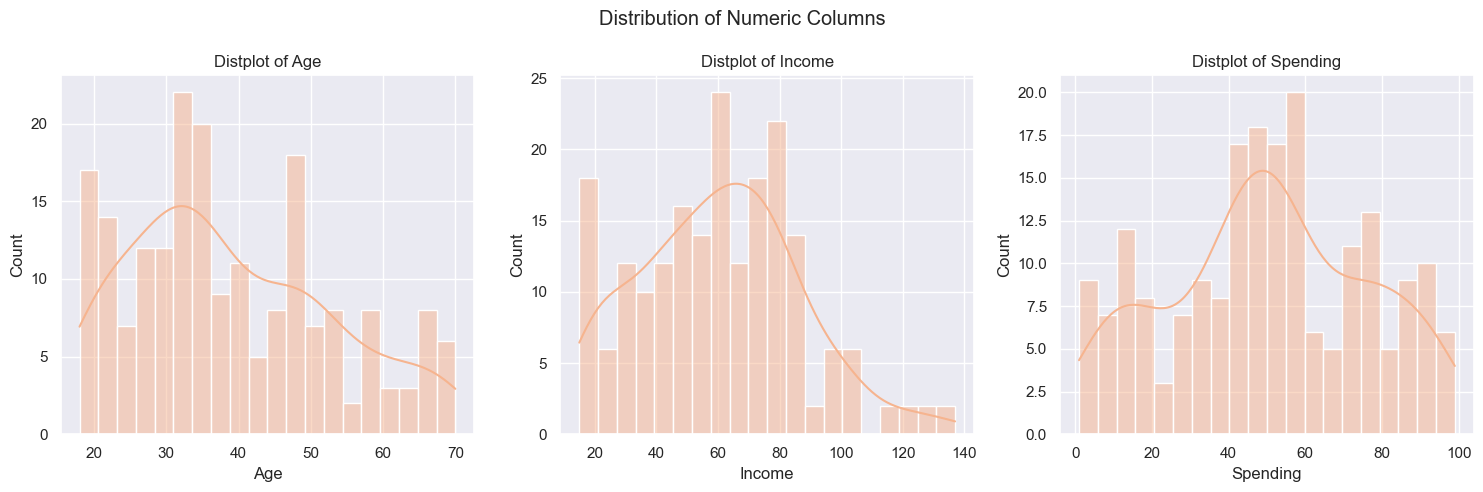

In [18]:
fig,ax = plt.subplots(1,3, figsize=(15, 5))

for i,x in enumerate(df.select_dtypes(include="int").columns):

    sns.histplot(data = df, x=x , bins = 20, ax=ax[i],kde=True)
    ax[i].set_title('Distplot of {}'.format(x))

fig.suptitle("Distribution of Numeric Columns")
plt.tight_layout()
plt.show()

Insights:
- The distribution of Age and Income are slightly skewed to the right but shouldn't be a huge problem here
- The distribution of spending is roughly symmetric
- The scales of the df are different.

### Bivariate Analysis

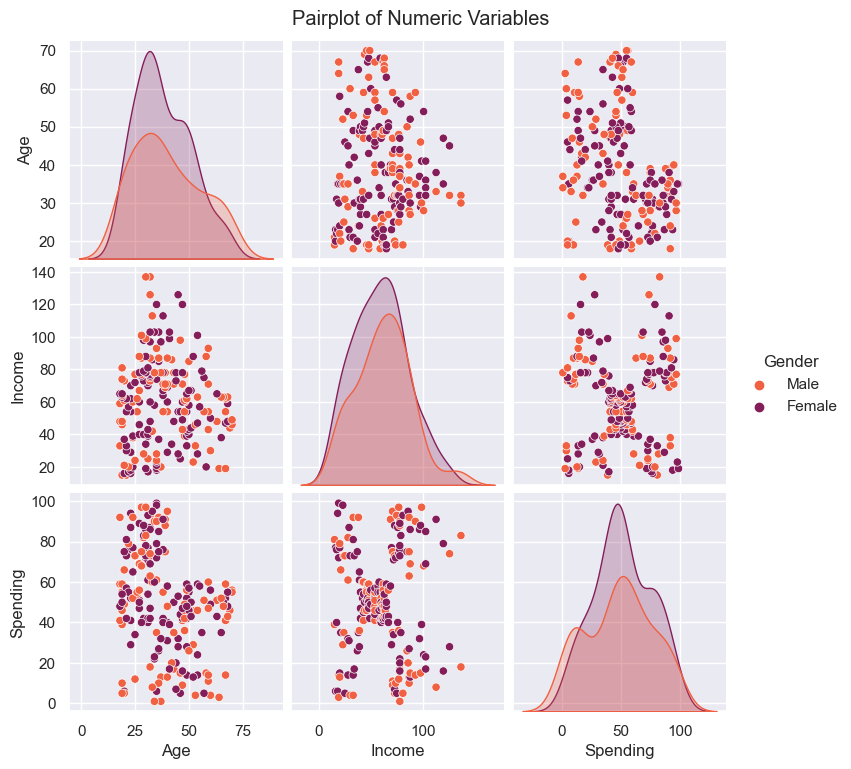

In [19]:
g = sns.pairplot(data = df,hue = "Gender",
                palette=sns.color_palette("rocket_r",n_colors=2))
g.fig.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()

Insights:
- The income vs Spending plot shows possibility of 5 clusters
- Other scatter plots don't show any clear clusters
- Relationships between columns doesn't seem to be linear
- Gender seems to be quite randomly dispersed in the data. There is a possibility that gender is simply adding noise. I will confirm this later.

## Preprocessing

Based on EDA, here are the transformations I want to make to the data

| Column   | Problem          | Transformation              |
|----------|------------------|-----------------------------|
| Spending | Different scales | StandardScaler              |
| Income   | Different scales | StandardScaler              |
| Age      | Different scales | StandardScaler              |
| Gender   | Categorical      | LabelEncoding               |

For the gender column I could also do One Hot Encoding, but since the column is binary, label encoding is fine. If the value is 1, it is male and 0 is female. If I do one hot it will just add a more dimensions for no reason and degrade my model. 

Instead of using label encoder, it is simpler to just use df.replace

I also don't want to apply standard scaling to the transformed gender column as there is no point, its just categorical

In [20]:
original = df.copy()
original=original.drop("Gender",axis=1)
df_temp = df.replace({"Male":1,"Female":0})
df_num = StandardScaler().fit_transform(df.drop("Gender",axis=1).values)
df = pd.DataFrame(df_num,index=df.index,columns=df_temp.drop("Gender",axis=1).columns)
df["Gender"] = df_temp["Gender"]

## Clustering Investigation

I know this sounds weird but the idea is that I want to find answers to the following questions:
- Does the data cluster well?
- Is dimension reduction needed? If yes, which algorithm
- Is the gender column needed?

### Does the data cluster well?
To assess this quantitatively, I will use a measure called Hopkin's Statistic. It is used to assess the clustering tendency of a data set by measuring the probability that a given data set is generated by uniform data distribution. In other words, it tests the spatial randomness of the data.

How to interpret H value:
- If the value is between {0.01, ...,0.3}, the data is regularly spaced.
- If the value is around 0.5, it is random.
- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [21]:
def hopkin(data):
    rows = data.shape[0]
    cols = data.shape[1]
    portion = int(0.1 * rows)
    X = data.values
    neighbors = NearestNeighbors(n_neighbors=1).fit(X)

    # sample a portion of data from X
    sample = np.random.uniform(X.min(axis=0),X.max(axis=0),size=(portion,cols))
    u_distance = neighbors.kneighbors(sample,return_distance=True)[0]

    # generate samples from x without replacement
    sample2 = np.random.choice(rows,size=portion,replace=False)
    w_distance = neighbors.kneighbors(X[sample2,:],n_neighbors=2,return_distance=True)[0][:,1]

    return ((u_distance**cols).sum())/(((u_distance**cols).sum())+((w_distance**cols).sum()))
print("Hopkin's Statistic: ", hopkin(df))

Hopkin's Statistic:  0.971728901255647


Insights: 
- The H values is more than 0.9 and thus it has high tendency to cluster
- We can reject the possibility that the data is uniformly distributed

### Dimension Reduction

Since the data is only 4 columns, it is not high dimension data and thus there is no need to reduce dimension as a preprocessing step.But this can be useful in visualising the data. The data provided only has 4 columns and technically it can be visualised in a 3d plane with the hue being gender. But 

1. That is hard to see as you need to rotate the graph to see al sides
2. Once we cluster the data, since hue is taken up by the gender column, we can't visualise the clusters.

Ideally we need to reduce the data into 2 dimensions so we can view the clusters easily. 

There are many methods of doing this, notably:
- PCA (Principle Components Analysis): Best for linear relationships. Cheaper Computationally
- t-SNE (t-distributed Stochastic Neighbor Embedding): Best for non-linear data. More expensive computationally.

During the EDA, I osbserved from the pairplot that the relationships don't seem linear. But we will plot them and compare.

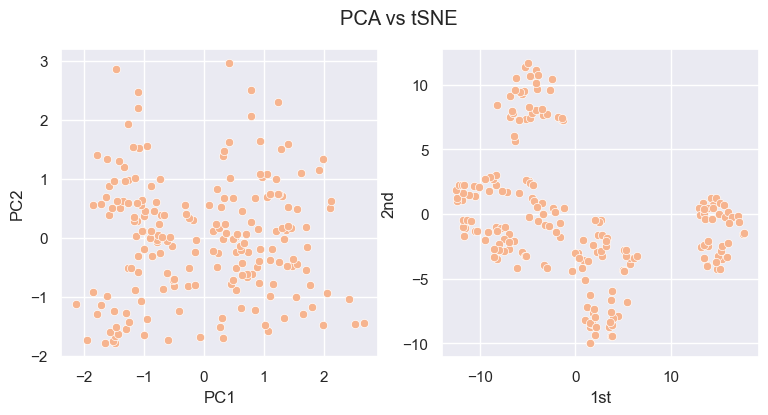

In [22]:
fig,ax = plt.subplots(1,2,figsize=(9,4))

pca = PCA(n_components=4).fit_transform(df)
df_pca = pd.DataFrame(data=pca[:,:2], columns=['PC1', 'PC2'])

tsne = TSNE(n_components=2, random_state=42).fit_transform(df.values)
df_tsne = pd.DataFrame(data=tsne, columns=['1st', '2nd'])

sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"],ax=ax[0])
sns.scatterplot(x=df_tsne["1st"], y=df_tsne["2nd"], ax=ax[1])

fig.suptitle("PCA vs tSNE")
plt.show()

Insights:
- As expected, PCA doesn't seem to maintain local relationships and thus no clear clusters are seen. This is due to PCA assuming linear relationships
- tSNE does show 4 or more clusters present. There are tight clusters at the middle right and top left

Tuning tSNE? 

tSNE has two paramters, perplexity and learning_rate, that can be tuned to produce better looking clusters. But I find this to be misleading as tSNE might suggest "imaginary" clusters. Therefore I will stick to the default parameters.

### Gender Column
As observed from the pairplot, Gender seems to have little relation to other variables. I will not be using the hopkin statistic here as it wouldn't be so effective.

To assess whether the gender column is necessary info or just noise, I will use permutation_importance to asses how important each column is and decide if gender column is needed

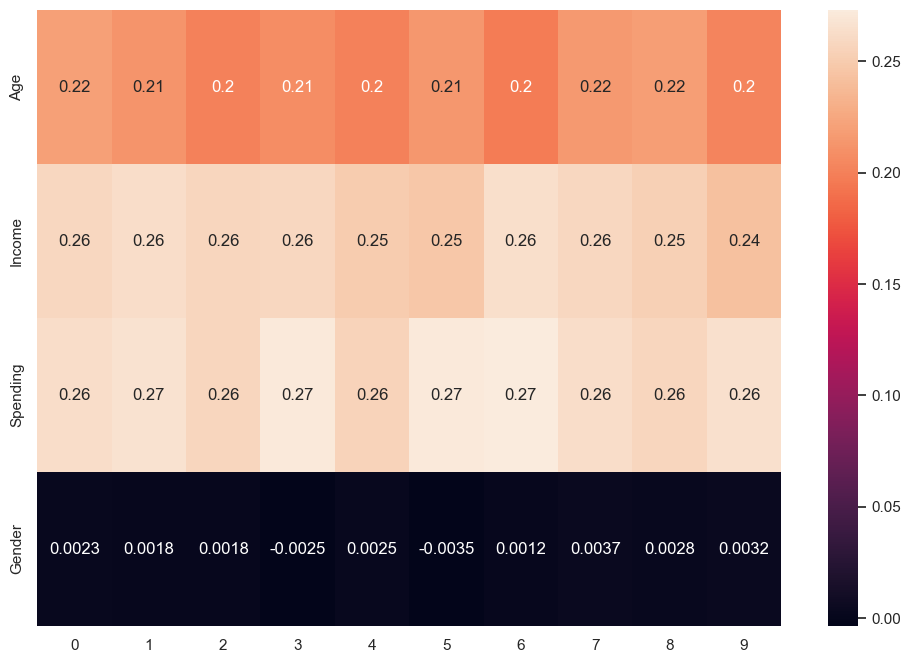

In [23]:
def getSilh(model,data):
    silh = []
    for k in range(2, 12):
        kmeans = model(n_clusters=k, random_state=42).fit(data)
        silh.append(silhouette_score(data, kmeans.labels_ , metric='euclidean'))
    return silh

def custom_silhouette_score(estimator, X,y):
    labels = estimator.labels_
    score = silhouette_score(X, labels)
    return score

kmeans = KMeans(n_clusters=6).fit(df.values)

res = permutation_importance(kmeans,df.values,y=None,scoring=custom_silhouette_score,n_repeats=10)

result = pd.DataFrame(data=res.importances,index=df.columns)
plt.figure(figsize=(12,8))
sns.heatmap(result,annot=True)
plt.show()

In all repeats, gender has very little importance. There is enough evidence to say it adds nothing but noise to the clustering.

Therefore, I will remove gender from the data from now. 

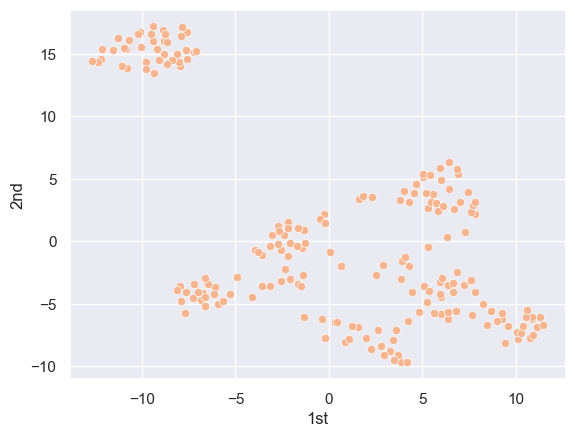

In [24]:
new_df = df.drop("Gender",axis=1)
data = new_df.values

def plotModel(model,k,data,**kwargs):
    models = model(n_clusters=k, random_state=42).fit(data)
    sns.scatterplot(x=red_data[:,0], y=red_data[:,1], 
                    hue=models.labels_, legend=False,
                   palette=sns.color_palette("rocket_r",n_colors=k),**kwargs)

red_data = TSNE(n_components=2, random_state=42).fit_transform(data)
red_df = pd.DataFrame(data=red_data, columns=['1st', '2nd'])
sns.scatterplot(x=red_df["1st"], y=red_df["2nd"])
plt.show()

## KMeans
KMeans is the most standard clustering algorithm. It searches for a predetermined number of clusters within an unlabelled dataset by using an iterative method to produce a final clustering based on the number of clusters defined by the user (represented by the variable K). Therefore it becomes very important that this K value is optimal.

There are two main methods of finding optimal k value, WCSS Plot and Silhoutte Scores. Our aim is to find the "elbow" in the WCSS Plot and the highest silhoutte score to decide on the k-value.

### Finding k-value

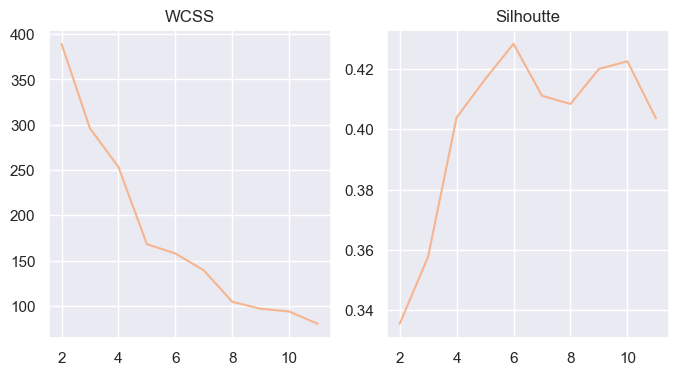

In [25]:
wcss = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(data)
    wcss.append(kmeans.inertia_)
silh = getSilh(KMeans,data)

fig,ax = plt.subplots(1,2,figsize=(8,4))

sns.lineplot(x=np.arange(2,12),y=wcss, ax=ax[0])
ax[0].set_title("WCSS")

sns.lineplot(x=np.arange(2,12),y=silh, ax=ax[1])
ax[1].set_title("Silhoutte")

fig.show()

Insights:
- Based on the WCSS, the elbow could be at either k= 6 or 8
- Silhoutte score maxes when k=6 but peaks again at k=8

Overall I would go for k=6 as both the plots indicate that number

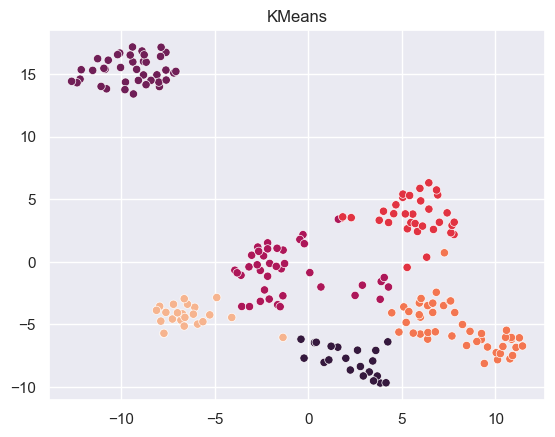

In [26]:
plotModel(KMeans,6,data)
plt.title("KMeans")
plt.show()

Insights:
- Purple clusters seems most distinct one in the data
- Remaining clusters are quite close

## Spectral Clustering
This is a clustering algorithm that uses Eigenvalue and Eigenvectors  to create lower dimensional representation of the datapoints and clustering them. This approach uses linear algebra and usually outperforms KMeans. To do spectral clustering, first we need a K-value to specify the number of clusters. To do so, just like KMeans I will look at silhoutte scores. 
### Finding K-value

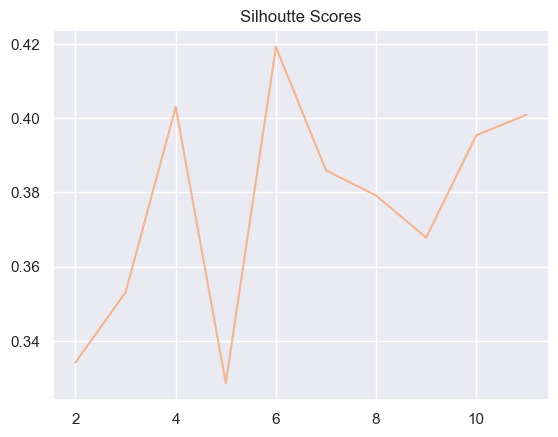

In [27]:
silh = getSilh(SpectralClustering,data)
sns.lineplot(x=np.arange(2,12),y=silh)

plt.title("Silhoutte Scores")
plt.show()

Insights:
- As you can see from the graph, k=6 has the highest silhoutte score
- You also see that when k=4 it is also not far behind

Since K=6 is the highest silhoutte score, I will go with it

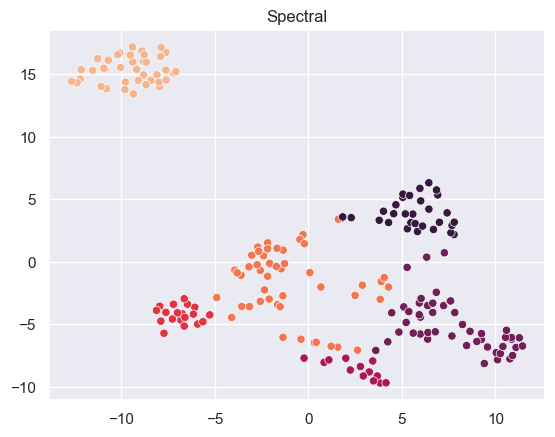

In [28]:
plotModel(SpectralClustering,6,data)
plt.title("Spectral")
plt.show()

Clusters look slightly similiar to KMeans. Overall fine

## Agglomerative Clustering

This is a hierachical algorithm that uses a bottoms up approach to clustering. It starts of with considering every point as it own clusters. Then it gradually increases cluster distance and causes the exisitng clusters to merge and form bigger clusters. We can visualise this process using a dendrogram. Using the dendrogram we can decide how many clusters to use.

### Finding K-value 
As mentioned, I will be using a dendrogram to decide on my K-value. To plot a dendrogram, we need a linkage matrix. This can be computed using the linage function from SciPy. When computing we need to specify the method to be used. 

There are five methods widely used:
![methods](https://i2.wp.com/dataaspirant.com/wp-content/uploads/2020/12/15-Hierarchical-Clustering-Linkages.png?resize=609%2C659&ssl=1)

Out of these, ward is the best for noisy data like ours. So I will be using that.

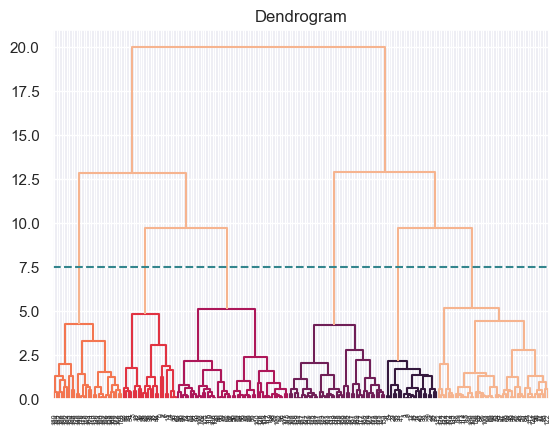

In [29]:
def plot_dendrogram(data , **kwargs):
    merge = linkage(data,method="ward")
    dendrogram(merge, **kwargs)
    plt.hlines(7.5,0,2000,linestyle="--",colors = sns.color_palette("crest",n_colors = 1))
    plt.title("Dendrogram")
    plt.show()
plot_dendrogram(data, color_threshold=8)

Insights:
- The dark orange cluster is quite distinct as it takes alot of distance to merge
- The same can be said for the black cluster 
- The two leafs of the yellow/black cluster are quite distinct as they take some distance to merge into the red cluster

In clustering I aim to preserve unique clusters and so I will draw the line at 7.5 which creates 6 unique clusters. The Black and Purple are slightly simliar but I am forced to cut them in order to ensure the leafs of the red cluster are separate. So I will set k=6 for this algorithm.

### Final Agglomerative Clustering

score:  0.4201169558789579


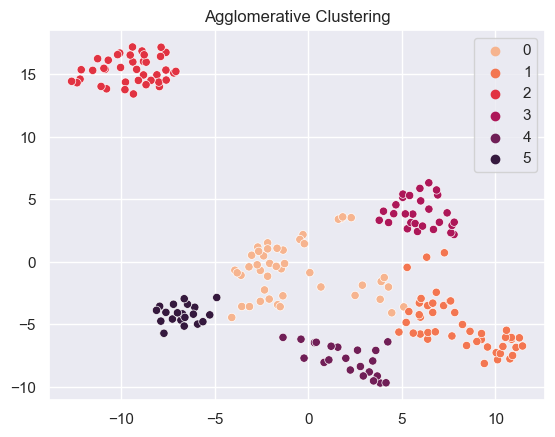

In [30]:
model2 = AgglomerativeClustering(n_clusters=6,linkage="ward").fit_predict(data)
print("score: ",silhouette_score(data, model2 , metric='euclidean'))
sns.scatterplot(x=red_data[:,0], y=red_data[:,1], hue=model2,
               palette=sns.color_palette("rocket_r",n_colors=6))
plt.title("Agglomerative Clustering")
plt.show()

Insights: 
- Visually, I find the results to be better than spectral as the points are quite tight especially in the middle
- Silhoutte score seems to be around the same

Overall its a good model.

## Gaussian Mixture Model
As the name might suggest, this is a probabilistic model. Unlike KMeans, it can handle clusters of weird shapes as it accounts for variance as well. The real unique feature of this model is that it has a soft approach to clustering where, instead of assigning each point to one cluster, it returns a set of proabilities of that point belongning to each cluster. This will be useful later to identify customers who might not fit into one category nicely.

Gaussian Mixture has 2 hyper parameter that can be tuned:
- Number of Components
- Type of Covariance
These parameters have a significant effect on the clustering. Therefore tuning them is essential. I will be using Gridsearch on the silhoutte score to Tune them.

### Tuning

In [38]:
def gmm_aic_score(estimator, X):
    return -estimator.aic(X)


param_grid = {
    "n_components": range(2, 12),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(random_state=99), param_grid=param_grid, scoring=gmm_aic_score
)
grid_search.fit(data)
res = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
res["mean_test_score"] = -res["mean_test_score"]
res = res.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "AIC score",
    }
)
res.sort_values(by="AIC score").head(10)

,Number of components,Type of covariance,AIC score
0,2,spherical,418.180492
10,2,tied,445.807336
20,2,diag,450.720984
1,3,spherical,459.045666
21,3,diag,477.480313
11,3,tied,482.853184
30,2,full,496.989208
2,4,spherical,536.929891
12,4,tied,547.411848
3,5,spherical,564.173007


Insights:
- Based on the gridsearch, best parameters are n_components=2 and covariance_type = "spherical"
- We will see 2 clusters formed
- The number of clusters in general seems to be very low for this model

Using k=2, I will now cluster the data.
Since this is a probabilistic model I will visualise the largest probability value using the size parameter in a scatter plot.

score:  0.33465797889497234


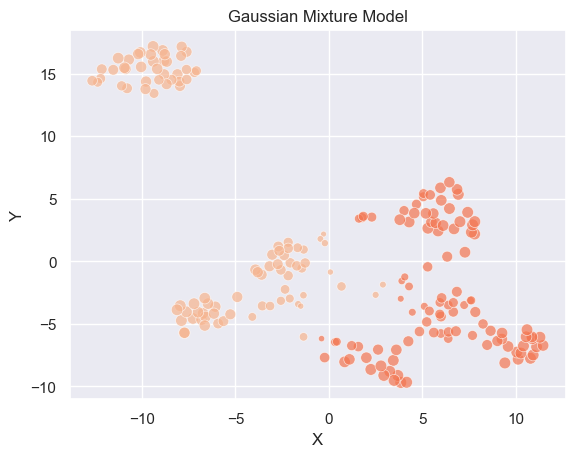

In [45]:
gmm = GaussianMixture(n_components=2,covariance_type="spherical", random_state=99)
gmm.fit(data)

probs = gmm.predict_proba(data)
ymax = np.amax(probs,axis=1)
print("score: ",silhouette_score(data, gmm.predict(data) ))
sns.scatterplot(x=red_data[:, 0], y=red_data[:, 1], hue=gmm.predict(data),
                size=ymax, 
                alpha=0.7, legend=False)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Mixture Model')
plt.show()

Insights:
- Overall the two clusters seem to be quite bad. Maybe its cuz of the tSNE.
- Silhoutte score is pretty low
- Points in between the two clusters are small indicating they could be in either clusters

Overall, I wouldn't use this model.

## Affinity Propogation

The main drawbacks of K-Means and similar algorithms are having to select the number of clusters, and choosing the initial set of points. Instead, Affinity represents the set of data as matrices and manipulates them to form clusters.

Affinity has a important hyper paramters to be tuned which is preference. It is a negative number that determines how many exemplars are used

To find the best parameters I will use silhoutte score as my primary metric. 

-25    0.430217
-24    0.430217
-23    0.425310
-27    0.425310
-28    0.425310
dtype: float64


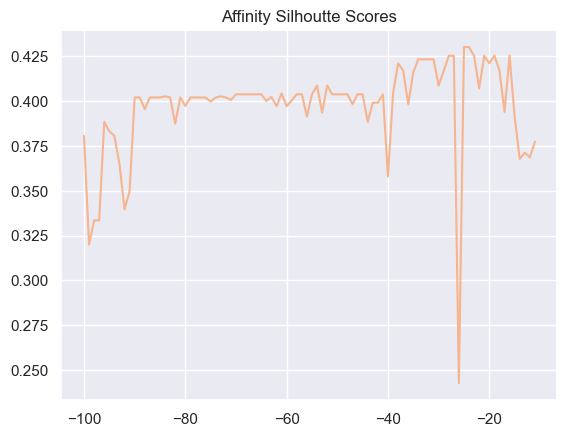

In [33]:
silh = []
for i in range(-100,-10,1):
    af = AffinityPropagation(preference=i).fit(data)
    if(len(af.cluster_centers_indices_)<2):
        silh.append(0)
    else:
        silh.append(silhouette_score(data,af.predict(data),random_state=42))

res = pd.Series(data = silh,index=np.arange(-100,-10,1))
print(res.sort_values(ascending=False).head())
sns.lineplot(x=np.arange(-100,-10,1),y=silh)
plt.title("Affinity Silhoutte Scores")
plt.show()

Insights:
- Silhouette scores are pretty volatile here
- Score maxes out when preference is -25
- Next best preference score is -24
- Difference between the top scores is pretty small

I will use -25

score:  0.4302173283111509


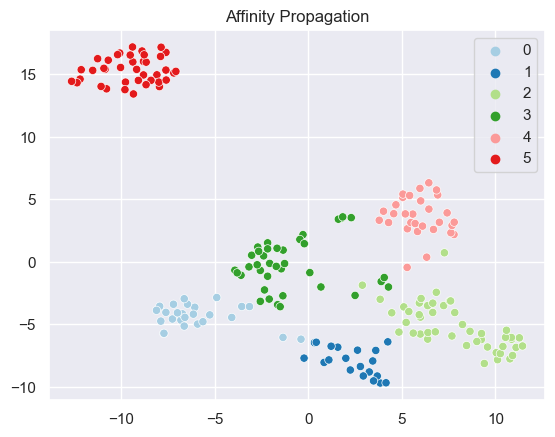

In [34]:
af = AffinityPropagation(preference=-25)
clustering = af.fit(data)
print("score: ",silhouette_score(data, clustering.predict(data) ))
sns.scatterplot(x=red_data[:,0], y=red_data[:,1], hue=clustering.predict(data),
               palette=sns.color_palette("Paired",n_colors=6))
plt.title("Affinity Propagation")
plt.show()

Insights:
- Affinity Propogation produces 6 clusters
- Red cluster, as usual in every model is pretty distinct
- Light green cluster seems to have a point that should be classified as pink instead
- In the middle there seems to be some mistakes in classifying points
- Sihoutte Score is pretty high

Overall I would say that this model's performance is good. I expected it to do even better as its a newer and more hyped model. 

### Model Comaparison

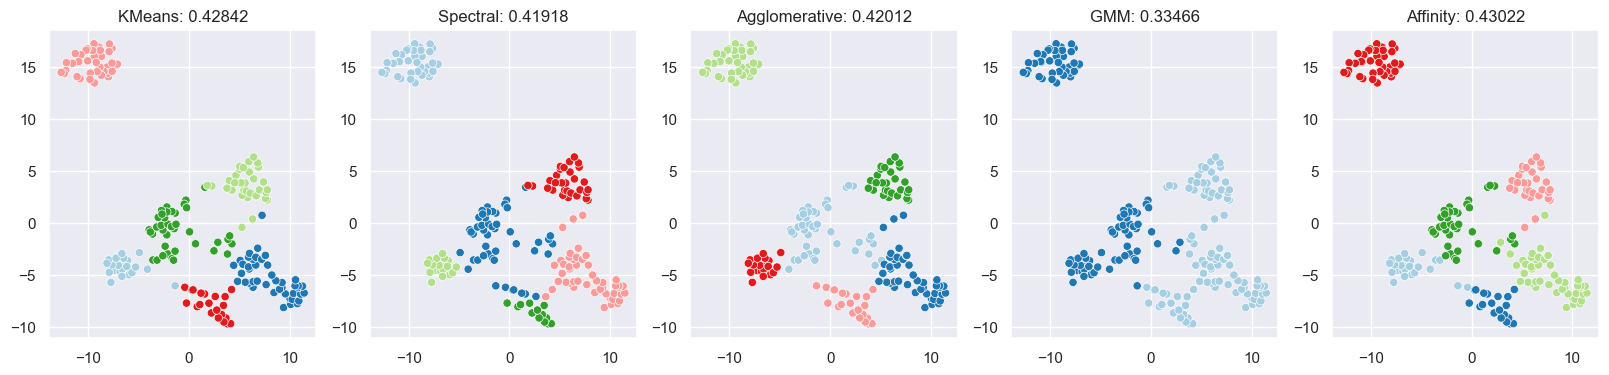

In [35]:
labels = [KMeans(n_clusters=6,random_state=42),SpectralClustering(n_clusters=6,random_state=42),
          AgglomerativeClustering(n_clusters=6),GaussianMixture(n_components=2,covariance_type="spherical", random_state=42),
         AffinityPropagation(preference=-25)]
names = ["KMeans","Spectral","Agglomerative","GMM","Affinity"]
fig,ax=plt.subplots(1,5,figsize=(20,4))
k=0
for i in labels:
    lab=i.fit_predict(data)
    sns.scatterplot(x=red_data[:,0],y=red_data[:,1],hue=lab,ax=ax[k],
                   palette=sns.color_palette("Paired"),
                   legend=False)
    score = "%.5f" % silhouette_score(data,lab)
    ax[k].set_title(f"{names[k]}: {score}")
    k+=1
fig.show()

Insights:
- All the models have on distinct cluster at the top left
- Affinity has the highest silhoutte score and GMM has the lowest
- Since the tSNE has little meaning on its axes, its hard to tell if the clusters at the bottom are meaningul or if they are distorted due to tSNE

Overall, I would go with Affinity Propagation as it has the best score

### Practical Implications
Since the affinity propagation model doesn't really tell us why it assigned each dot, it is going to be easier to interpret the data using a surrogate model.

A good surrogate model will be a decision tree classifier which can be visualised to see the rules. 

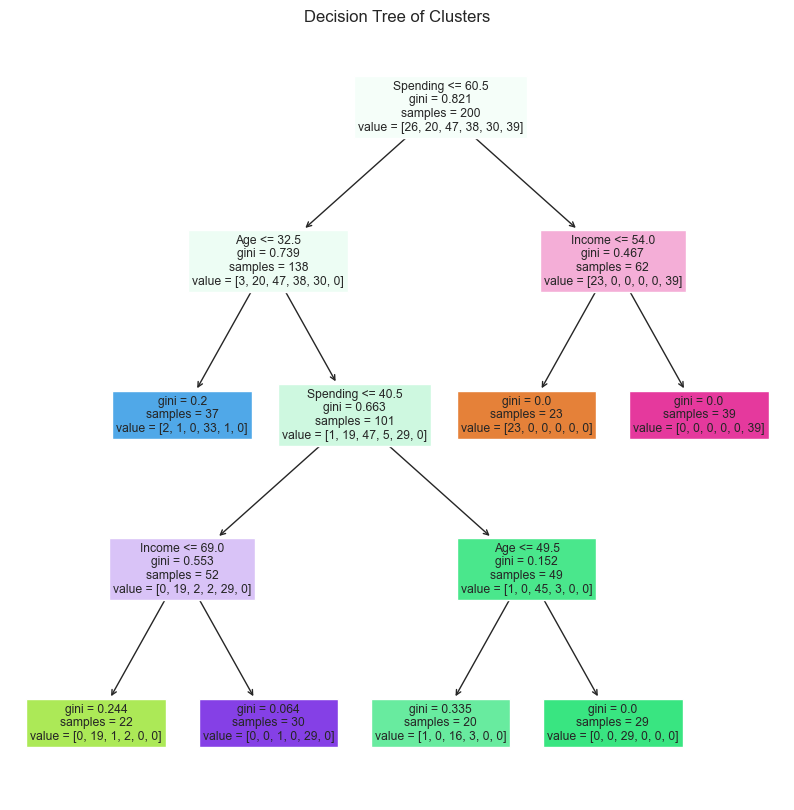

In [36]:
af = AffinityPropagation(preference=-25)
labels=af.fit_predict(data)
tree = DecisionTreeClassifier(min_samples_leaf=20)
clf = tree.fit(original,labels)
plt.figure(figsize=(10,10))
plot_tree(clf,feature_names=new_df.columns,filled=True)
plt.title("Decision Tree of Clusters")
plt.show()

The tree structure is very complex at first. There were leafs with 1 or 2 samples. So I set a min_samples_leaf to 20 to get meaningful rules. In the tree, if the left leaf means that the condition is true and the right leaf means its false. Going by that, lets begin writing down the rules for each class.
| Color of Cluster | Number of Samples | Type of Customer  | Demographic Info                            | Marketing Strategy                                                                                                         |
|------------------|------------------|-------------------|--------------------------------------------|----------------------------------------------------------------------------------------------------------------------------|
| Orange           | 23               | Reckless Spender  | High Spender, Low Income                   | Try upselling them high-profit stuff like luxury items.                                                                 |
| Pink             | 39               | Big Ticket        | High Spenders, High Income                 | Focus on retaining them through memberships and loyalty programs. Focus on selling high profit items.             |
| Blue             | 38               | Kids              | Low Spenders, Young                        | Encourage them to spend more by selling trendy items as they are young and naive.                                        |
| Green            | 49               | Elderly           | Moderate Spenders                           | They usually buy normal grocery stuff. Try to sell more by giving bundles that are discounted.          |
| Light Green      | 22               | Cheapskates       | Low Spenders, Middle Aged, Low Income      | Very hard to market them as they are just window shopping or don't have money. Ignore and focus on other categories.     |
| Purple           | 30               | Value Hunters     | Low Spenders, Middle Aged, High Income     | Entice using decoy pricing and other gimmicks to create the illusion of value and get them to spend more.                |

This is the findings of this analysis. By gathering the info of customers, the store can market to them more effectively and increase their profits. 